# Intel Python HackFury Team Analysis

Analyze the teams for the [HackerEarth - Intel Python HackFury]https://www.hackerearth.com/challenges/hackathon/intel-python-hackfury2/participants/#participants) from the HTML page

In [1]:
%matplotlib inline

import datetime
import glob
import ipywidgets
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import time

from bs4 import BeautifulSoup

## Global parameters and variables

In [2]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
html_file = './data/Online Hackathon _ HackerEarth developer event _ Intel Python HACKFURY.html'
with open(html_file, encoding="utf-8") as f:
    html_content = f.read()
soup = BeautifulSoup(html_content, 'html.parser')
team_divs = soup.find_all(class_="pl-card-header")

In [4]:
teams = []
for team_div in team_divs:
    team_name = team_div.find('span').text.strip()
    team_member_divs = team_div.find_all(class_="profile-pic-name")
    team_members = [member.text.strip() for member in team_member_divs]
    teams.append((team_name, team_members))

In [5]:
df = pd.DataFrame(teams)
df.columns = ["TeamName", "TeamMembers"]
df["TeamSize"] = df["TeamMembers"].str.len()
df["DefaultName"] = np.where(df["TeamName"].str.match(r".*_[0-9abcdef]{4}"), True,  False)
print("Shape : ", df.shape)
df.sample(10)

Shape :  (4537, 4)


,TeamName,TeamMembers,TeamSize,DefaultName
2706,priyanshu322_f162,[Priyanshu Somani],1,True
3265,samhita19_b6f0,[Samhita Gadamsetty],1,True
3556,avi.tomar12_78cd,[Avi tomar],1,True
3996,ukkalamsai_629c,[Ukkalam Sai Sreevathsav],1,True
1348,FrictioNN_f5cd,[Arpit Gupta],1,True
2329,sohail102_9a20,[Sohail Ustad],1,True
1952,manikandan324_0a0c,[Manikandan Ramanujam],1,True
206,nikitha258_8f59,"[Nikitha B M, kavyakrishnamurty5]",2,True
369,ritika104_a024,[Ritika Agarwal],1,True
3847,Techno-Creatv,"[tejasvi singh, akhtar.j1990]",2,False


True     4258
False     279
Name: DefaultName, dtype: int64


Text(0.5, 1.0, 'Actual Teams vs Default Teams')

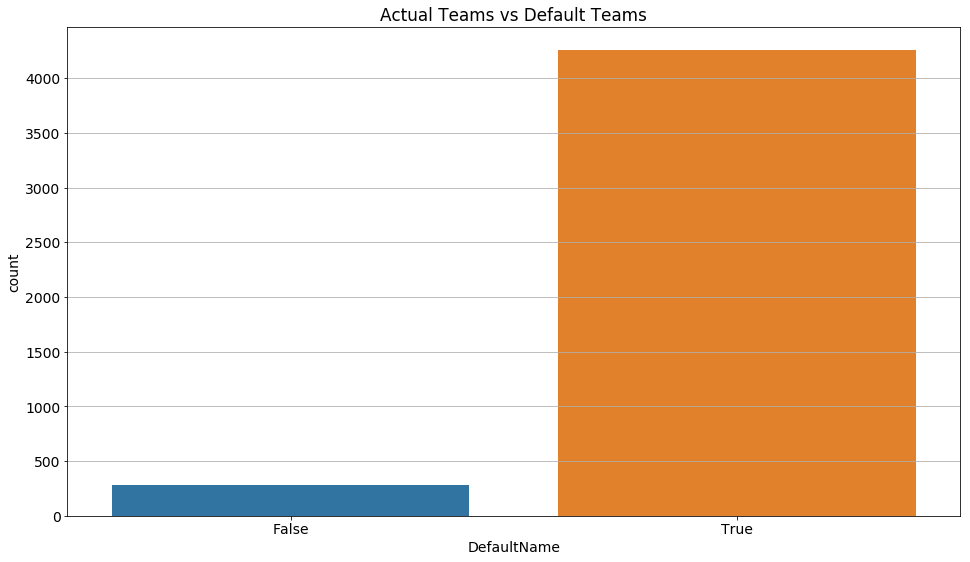

In [6]:
print(df["DefaultName"].value_counts())
sns.countplot(x="DefaultName", data=df)
plt.title("Actual Teams vs Default Teams")

False    279
Name: DefaultName, dtype: int64


Text(0.5, 1.0, 'Actual Team Sizes')

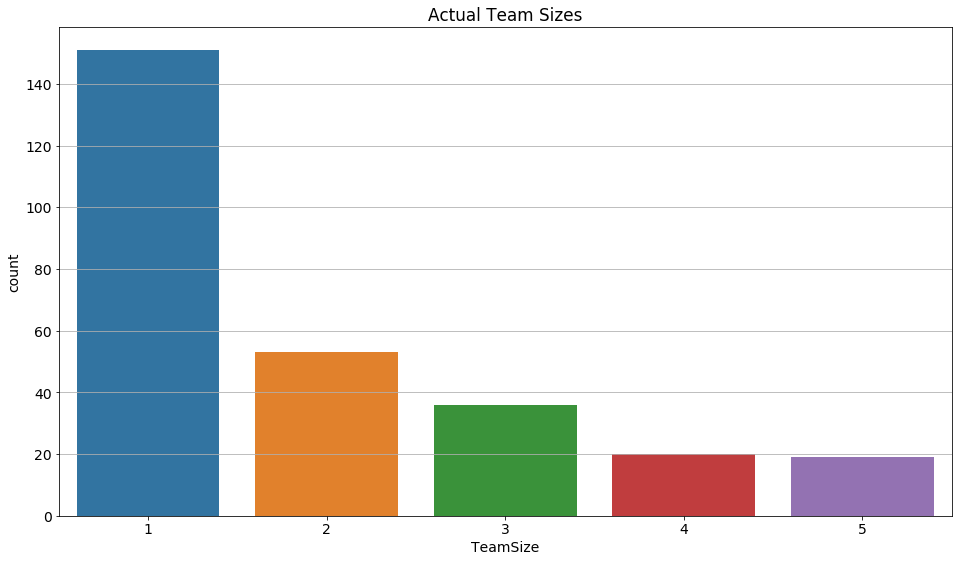

In [7]:
print(df[df["DefaultName"]==False]["DefaultName"].value_counts())
sns.countplot(x="TeamSize", data=df[df["DefaultName"]==False])
plt.title("Actual Team Sizes")